In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv(r"G:\Resume projects\Calculating_credit_worthiness_for_rural_India\Data\trainingData .csv")

In [12]:
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [13]:
df.shape

(40000, 21)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [15]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
Id,40000.0,20000.500000,11547.149720,1.0,10000.75,20000.5,30000.25,40000.0
age,40000.0,55.159900,3830.355660,2.0,29.00,35.0,42.00,766105.0
annual_income,40000.0,37640.214425,28739.116481,0.0,14400.00,36000.0,56000.00,1200000.0
monthly_expenses,39880.0,3810.875401,4592.958009,2.0,2500.00,3500.0,4000.00,240000.0
old_dependents,40000.0,0.044900,0.222003,0.0,0.00,0.0,0.00,3.0
young_dependents,40000.0,1.137100,1.073840,0.0,0.00,1.0,2.00,7.0
home_ownership,39621.0,0.972489,0.163568,0.0,1.00,1.0,1.00,1.0
occupants_count,40000.0,26.641000,4749.995485,0.0,2.00,3.0,4.00,950000.0
house_area,40000.0,552.804750,4596.921905,0.0,200.00,400.0,600.00,700000.0
sanitary_availability,39792.0,0.686369,0.464028,-1.0,0.00,1.0,1.00,1.0


* age column has some outliers
* min of monthly expenses need to analyse
* old_dependents, young_dependents, home_ownership, occupants_count, sanitary_availability and water_availabity are categorical columns.
* Max loan tenure and installments are for 84 months i.e 7 years.
* id column is primary key column we can drop it.


In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

we need to treat missing values.

# EDA

In [18]:
df_copy=df.copy()

In [19]:
df.nunique()

Id                       40000
city                       856
age                         62
sex                          3
social_class               519
primary_business           441
secondary_business           5
annual_income              359
monthly_expenses           260
old_dependents               4
young_dependents             8
home_ownership               2
type_of_house                3
occupants_count             23
house_area                 391
sanitary_availability        3
water_availabity             4
loan_purpose                37
loan_tenure                 11
loan_installments           21
loan_amount                115
dtype: int64

### Univarient Analysis

In [20]:
### creating 2 categories, cat_1 with many uniques values and cat_2 for less unique values for easy analysis
cat_1=['city', 'social_class', 'primary_business',
       'occupants_count',
        'loan_purpose', 'loan_tenure', 'loan_installments']

cat_2=['sex','secondary_business','old_dependents','young_dependents','home_ownership','type_of_house','sanitary_availability','water_availabity']

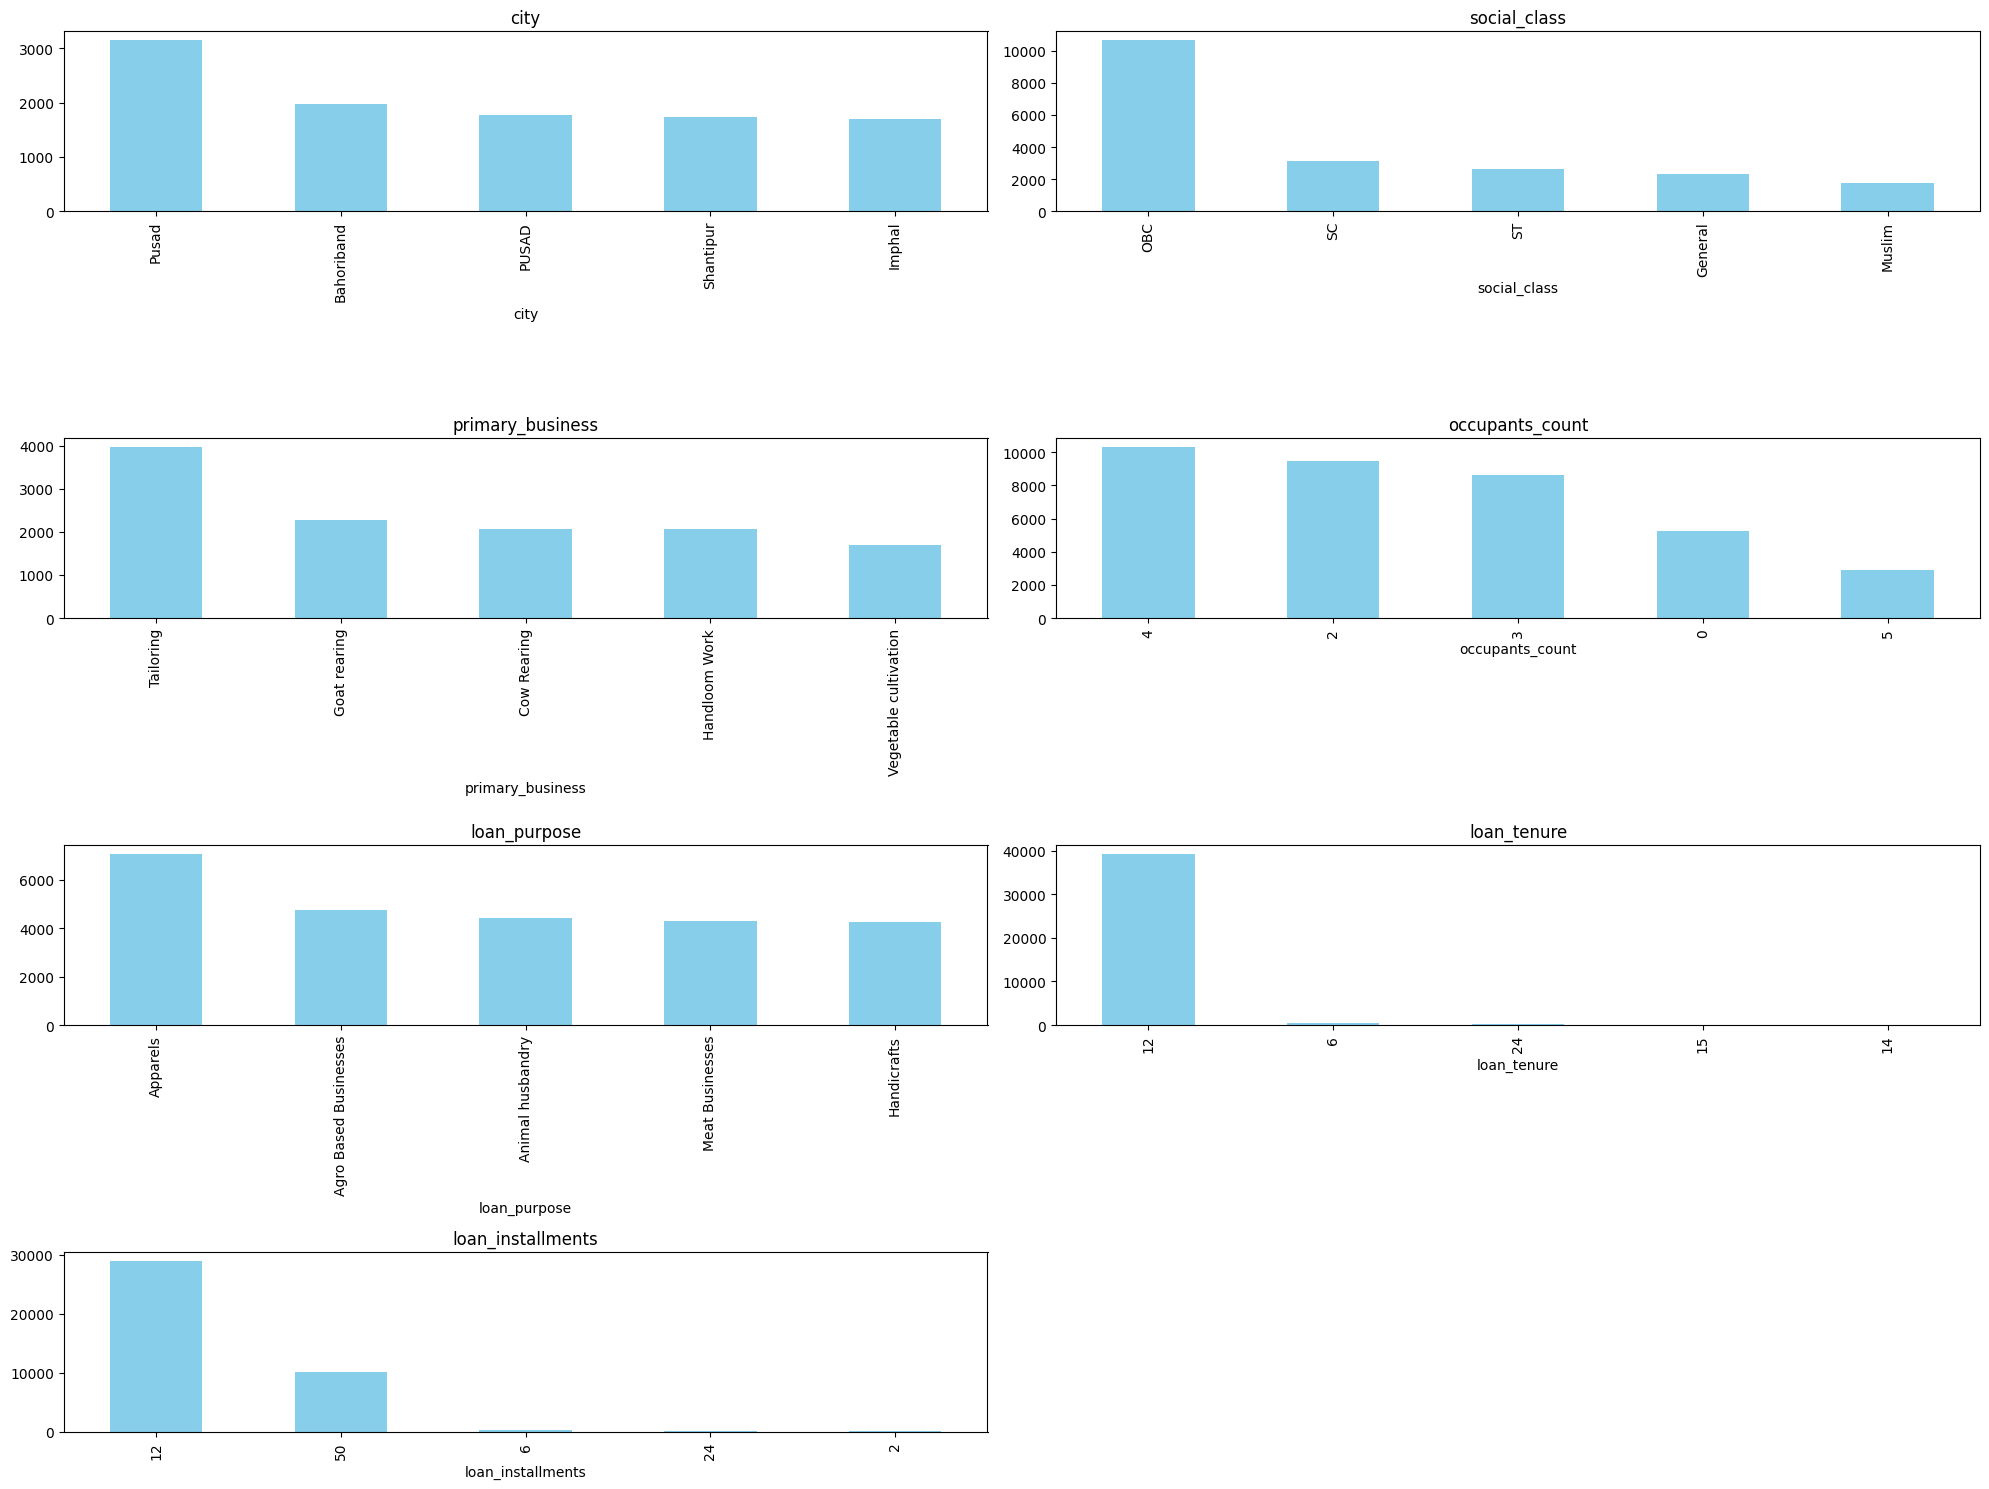

In [21]:
plt.figure(figsize=(20, 15))

index = 1 
for i in cat_1:
    top_10 = df[i].value_counts().sort_values(ascending=False).head(5)
    plt.subplot(4, 2, index) 
    top_10.plot(kind='bar', color='skyblue')
    plt.title(i)
    index += 1 

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
    


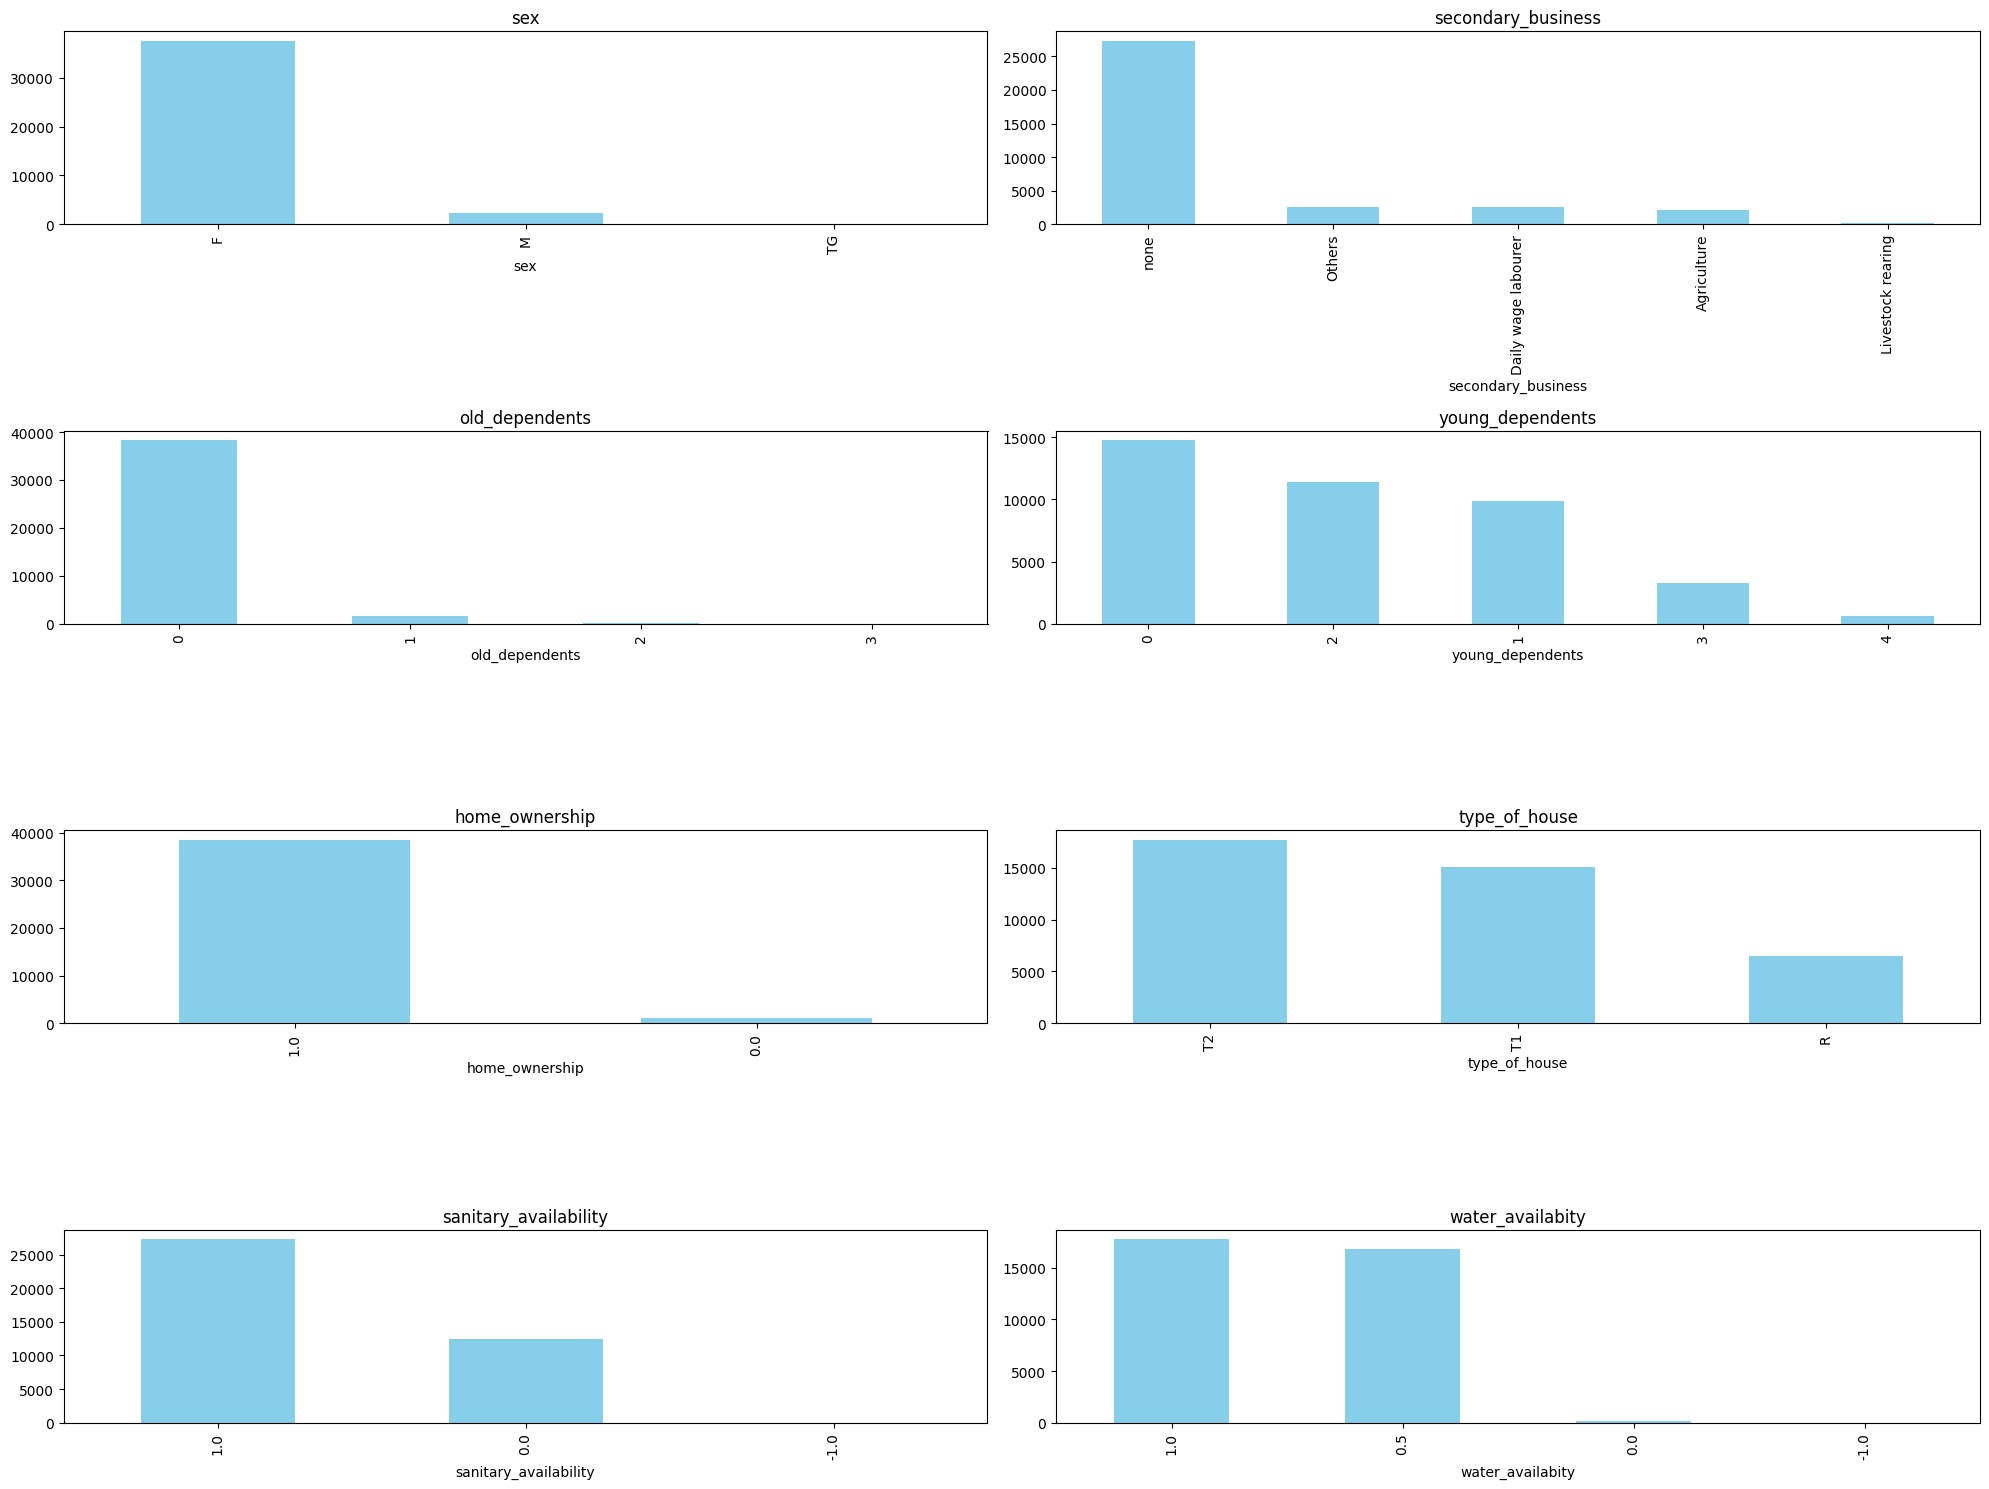

In [22]:
plt.figure(figsize=(20, 15))

index = 1 
for i in cat_2:
    top_10 = df[i].value_counts().sort_values(ascending=False).head(5)
    plt.subplot(4, 2, index) 
    top_10.plot(kind='bar', color='skyblue')
    plt.title(i)
    index += 1 

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Conclusion:

* Most of people are fall in 30-35 age
* Female count is more than male.
* Most of the people belongs to OBC cast.
* Primary business are Tailoring, Goat rearing, Cow Rearing, Handloom Work and Vegetable cultivation.
* Many people haven't specified their secondary business.
* Most of them haven't specified their Annual income.
* Most of people don't have any old_dependents.
* Most of the people have either no young_dependents or 1 or 2 dependents.
* Most of the people have their own house owership.
* Few people are living in R type house.
* 5268 have zero occupants 
* Many people haven't specified their house area.
* Most of the people have sanitary availability. 
* Most of people have water availabity, in that few have partial water availabilty.
* Most of the people took loan for business and education purpose.
* Mostly all have 12 months loan_tenure.
* most of the People took loan of amount between 5000-10000.


### Outlier detection and treatment

In [23]:
num_col=['age','annual_income','monthly_expenses','occupants_count','house_area','loan_tenure','loan_installments','loan_amount']

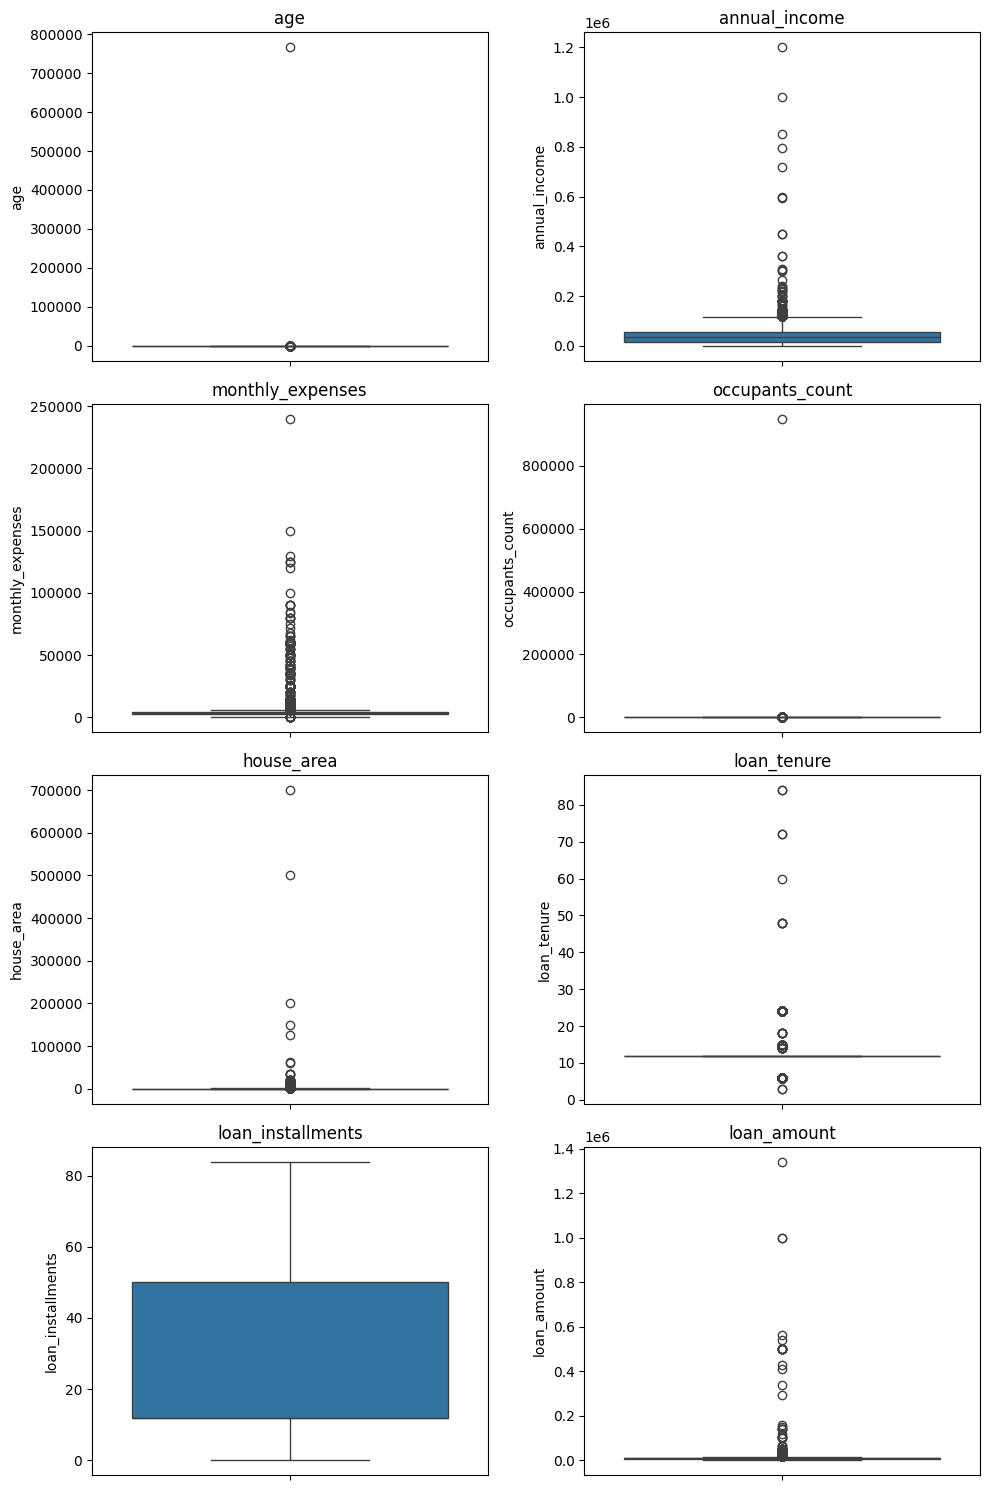

In [24]:
plt.figure(figsize=(10,15))
index=1

for i in num_col:
    plt.subplot(4,2,index)
    sns.boxplot(df[i])
    plt.title(i)
    index+=1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [25]:
def iqr_method(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col} IQR  range:{lower_bound}:{upper_bound}")

In [26]:
for i in num_col:
    iqr_method(i)

age IQR  range:9.5:61.5
annual_income IQR  range:-48000.0:118400.0
monthly_expenses IQR  range:250.0:6250.0
occupants_count IQR  range:-1.0:7.0
house_area IQR  range:-400.0:1200.0
loan_tenure IQR  range:12.0:12.0
loan_installments IQR  range:-45.0:107.0
loan_amount IQR  range:-2500.0:17500.0


In [27]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,55.159900,3830.355660,2.0,29.0,35.0,42.0,766105.0
annual_income,40000.0,37640.214425,28739.116481,0.0,14400.0,36000.0,56000.0,1200000.0
monthly_expenses,39880.0,3810.875401,4592.958009,2.0,2500.0,3500.0,4000.0,240000.0
occupants_count,40000.0,26.641000,4749.995485,0.0,2.0,3.0,4.0,950000.0
house_area,40000.0,552.804750,4596.921905,0.0,200.0,400.0,600.0,700000.0
loan_tenure,40000.0,12.032225,1.367473,3.0,12.0,12.0,12.0,84.0
loan_installments,40000.0,21.761175,16.682458,0.0,12.0,12.0,50.0,84.0
loan_amount,40000.0,8412.592500,13596.938096,100.0,5000.0,8000.0,10000.0,1343000.0


In [28]:
df.query("annual_income > 118400.0 and monthly_expenses > 6250.0 and house_area > 1200.0  ")[["annual_income","monthly_expenses","house_area","loan_amount"]]

,annual_income,monthly_expenses,house_area,loan_amount
18981,120000.0,10000.0,3040.0,20000.0
36696,120000.0,8000.0,1500.0,10000.0
37549,126000.0,6900.0,1500.0,8000.0
37567,144000.0,8500.0,2000.0,8000.0
37571,120000.0,8500.0,3000.0,8000.0
37823,120000.0,9000.0,2000.0,12600.0
38201,310000.0,10000.0,1600.0,10000.0


Here we can see those people who has high income have normal month expenses and loan amount. So we need to treat this outliers.

#### Replacing outliers with median

In [29]:
df["annual_income"]=np.where(df["annual_income"]> 118400.0,df["annual_income"].median(),df["annual_income"])
df["monthly_expenses"]=np.where(df["monthly_expenses"]> 6250.0,df["monthly_expenses"].median(),df["monthly_expenses"])
df["occupants_count"]=np.where(df["occupants_count"]> 7.0,df["occupants_count"].median(),df["occupants_count"])
df["house_area"]=np.where(df["house_area"]> 1200.0,df["house_area"].median(),df["house_area"])
df["loan_amount"]=np.where(df["loan_amount"]> 17500.0,df["loan_amount"].median(),df["loan_amount"])

In [30]:
# age has some errors 
df.query("age>100")["age"]

9337        205
10236    766105
11993       288
Name: age, dtype: int64

In [31]:
df["age"]=np.where(df["age"]>100,df["age"].median(),df["age"])

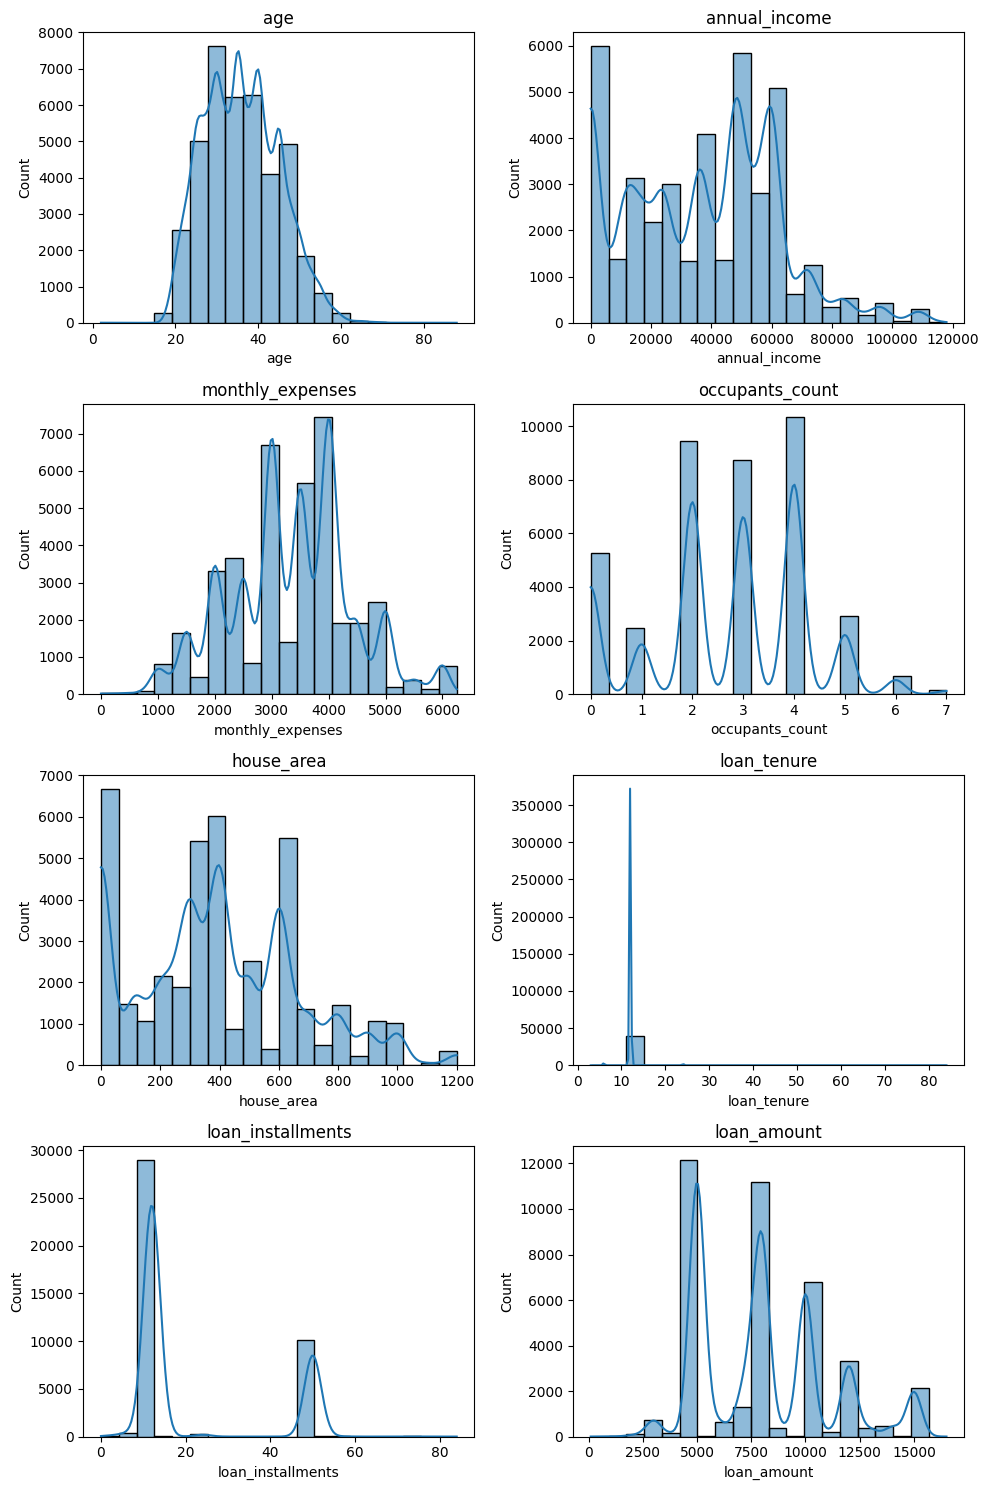

In [32]:
plt.figure(figsize=(10,15))
index=1

for i in num_col:
    plt.subplot(4,2,index)
    sns.histplot(data=df,x=i,kde=True,bins=20)
    plt.title(i)
    index+=1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Missing values treatment

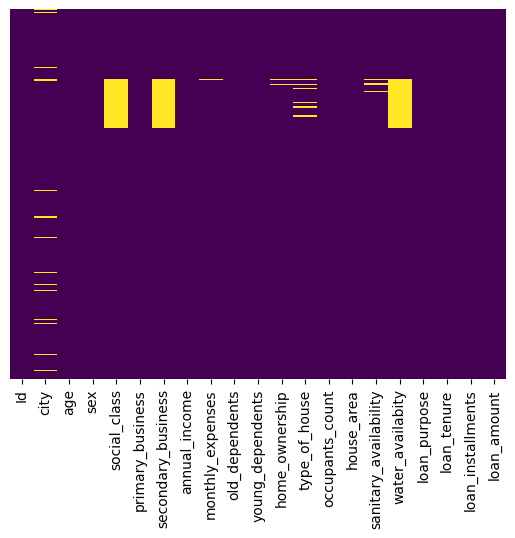

In [33]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [34]:
df["social_class"].mode()[0]

'OBC'

In [35]:
# replacing categorical null values with mode and numerical null values with median
def cat_fillna(col):
    df[col]=df[col].fillna(df[col].mode()[0])

def num_fillna(col):
    df[col]=df[col].fillna(df[col].median())

In [36]:
cat_col=['city', 'sex', 'social_class', 'primary_business',
       'secondary_business',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments']

num_col=['age','annual_income','monthly_expenses','house_area','loan_amount']

In [37]:
for i in cat_col:    
    cat_fillna(i)

In [38]:
for i in num_col:
    num_fillna(i)

In [39]:
#sanitary_availability and water_availabity have some -1 value in same row we will replace it with 0
df.query("water_availabity == -1")

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
28817,28818,Kakching,54.0,F,OBC,Vegetable vendor,none,36000.0,2000.0,0,...,1.0,T2,3.0,400.0,-1.0,-1.0,Agro Based Businesses,12,12,8000.0


In [40]:
df["sanitary_availability"]=np.where(df["sanitary_availability"]== -1 , 0,df["sanitary_availability"])
df["water_availabity"]=np.where(df["water_availabity"] == -1 ,0, df["water_availabity"])

In [41]:
#few columns data in float which is unnecessary
ls=['age','home_ownership','occupants_count','sanitary_availability','water_availabity']

for i in ls:
    df[i]=df[i].astype(int)


In [42]:
df.isnull().sum()

Id                       0
city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

In [43]:
#Id is not needed as it is index column
df.drop("Id",inplace=True,axis=1)

Data is cleaned now

### Bi varient analysis

In [44]:
df.loc[:,["sex","annual_income"]].query("sex=='F'").value_counts()

sex  annual_income
F    0.0              5605
     48000.0          4276
     60000.0          4268
     36000.0          3109
     24000.0          2542
                      ... 
     27400.0             1
     28700.0             1
     31200.0             1
     67500.0             1
     46400.0             1
Name: count, Length: 311, dtype: int64

* Many women dont have income.

In [45]:
df.columns

Index(['city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount'],
      dtype='object')

### Preprocessing

Skipping some features for model creation du the following reasons:

* Either the feature has too many categorical features. They're - ['city', 'social_class', 'primary_business', 'secondary_business', 'loan_purpose']
* The feature is not a good predictor for lending model. They're - ['sanitary_availability', 'water_availabity']

In [46]:
selected_features = [
    "Id", "age", "sex", "annual_income", "monthly_expenses", "old_dependents", "young_dependents",  "home_ownership", "type_of_house",
    "occupants_count", "house_area", "loan_tenure", "loan_installments"
]

selected_num_features=['age', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'occupants_count', 'house_area', 'loan_tenure', 'loan_installments',]
selected_cat_features= ['sex', 'type_of_house', 'home_ownership']
target_col=['loan_amount']

In [47]:
X=df[selected_num_features+selected_cat_features+target_col]

In [48]:
X.columns

Index(['age', 'annual_income', 'monthly_expenses', 'old_dependents',
       'young_dependents', 'occupants_count', 'house_area', 'loan_tenure',
       'loan_installments', 'sex', 'type_of_house', 'home_ownership',
       'loan_amount'],
      dtype='object')

In [49]:
x=X.drop("loan_amount",axis=1)
y=X["loan_amount"]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [52]:
scaler=StandardScaler()
encoder=OneHotEncoder()

In [53]:
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",encoder,selected_cat_features),
        ("StandardScaler",scaler,selected_num_features)
    ]
)

In [54]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error

In [57]:
MAE={}
r2score={}
MAPE={}
def model_trainer(model,name):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    MAE[name]=mean_absolute_error(y_pred,y_test)
    r2score[name]=r2_score(y_pred,y_test)
    MAPE[name]=mean_absolute_percentage_error(y_pred,y_test)

    return MAE,r2score,MAPE

In [58]:
models={
    "Linear Regression":LinearRegression(),
    "Random forest":RandomForestRegressor(),
    "Ada boost":AdaBoostRegressor(),
    "Gradient boost":GradientBoostingRegressor(),
    "Decision tree":DecisionTreeRegressor()
}

In [59]:
for name,model in models.items():
    model_trainer(model,name)

In [60]:
MAE

{'Linear Regression': 2053.508776041667,
 'Random forest': 1513.578464607345,
 'Ada boost': 2181.31103382063,
 'Gradient boost': 1753.5452835630663,
 'Decision tree': 1803.2169752901466}

In [61]:
r2score

{'Linear Regression': -2.5972388809406777,
 'Random forest': 0.12251421875141266,
 'Ada boost': -3.0214509593266765,
 'Gradient boost': -0.8027092487226053,
 'Decision tree': 0.09549543619217127}

In [62]:
MAPE

{'Linear Regression': 0.2525864122398428,
 'Random forest': 0.18542484823696903,
 'Ada boost': 0.2449193466276162,
 'Gradient boost': 0.21570862743542435,
 'Decision tree': 0.22898987245284738}

### Model Building

In [63]:
preprocessor2=ColumnTransformer(
    [
        ("OneHotEncoder",encoder,selected_cat_features),
        ("StandardScaler",scaler,selected_num_features),
        ("StandardScaler2",scaler,target_col)
    ]
)

In [64]:
X=preprocessor2.fit_transform(X)

In [65]:
from sklearn.cluster import KMeans

In [66]:
SSE = []
Sil_Score = []
n_clusters = range(2,10)
for k in n_clusters:
    cluster = KMeans(n_clusters=k,random_state=42,n_init=10)
    cluster.fit(X)
    SSE.append(cluster.inertia_)
    y_pred = cluster.predict(X)
    sil_score = silhouette_score(X,y_pred)
    Sil_Score.append(sil_score)

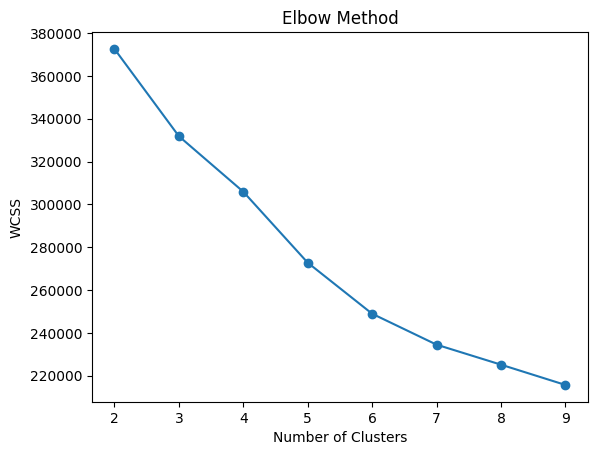

In [67]:
plt.plot(range(2, 10), SSE, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

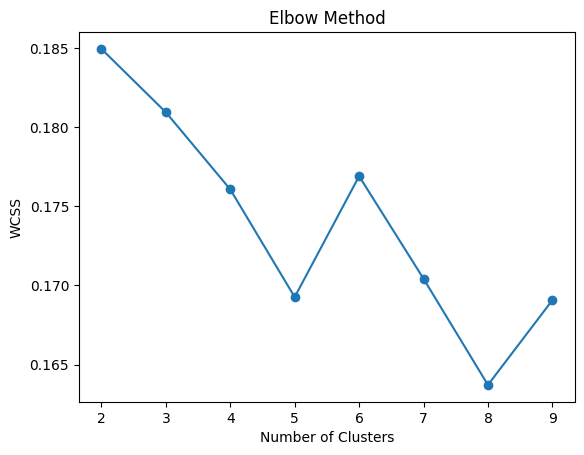

In [68]:
plt.plot(range(2, 10), Sil_Score, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Creating 3 clusters

In [69]:
kmean=KMeans(n_clusters=3,random_state=42,n_init=10)
df["cluster"]=kmean.fit_predict(X)

In [70]:
df.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,...,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount,cluster
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,...,R,4,70.0,1,0,Apparels,12,12,5000.0,2
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,...,T1,4,80.0,1,0,Apparels,12,50,7500.0,0
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,...,T1,4,50.0,1,0,Beauty Salon,12,12,5000.0,2
3,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,...,T1,5,50.0,1,0,Apparels,12,50,7500.0,0
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,...,T1,1,112.0,1,0,Retail Store,12,12,5000.0,1


In [72]:
selected_features = [
    "Id", "age", "sex", "annual_income", "monthly_expenses", "old_dependents", "young_dependents",  "home_ownership", "type_of_house",
    "occupants_count", "house_area", "loan_tenure", "loan_installments"
]

selected_num_features=['age', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'occupants_count', 'house_area', 'loan_tenure', 'loan_installments','loan_amount']
selected_cat_features= ['sex', 'type_of_house', 'home_ownership']
target_col=["cluster"]

X_new=df[selected_num_features+selected_cat_features+target_col]

In [73]:
X_new.head()

,age,annual_income,monthly_expenses,old_dependents,young_dependents,occupants_count,house_area,loan_tenure,loan_installments,loan_amount,sex,type_of_house,home_ownership,cluster
0,22,36000.0,5000.0,0,2,4,70.0,12,12,5000.0,F,R,1,2
1,21,94000.0,3600.0,1,1,4,80.0,12,50,7500.0,F,T1,1,0
2,24,48000.0,4000.0,0,2,4,50.0,12,12,5000.0,M,T1,1,2
3,26,7000.0,5000.0,0,2,5,50.0,12,50,7500.0,F,T1,1,0
4,23,36000.0,3500.0,0,0,1,112.0,12,12,5000.0,F,T1,1,1


In [74]:
x=X_new.drop("cluster",axis=1)
y=X_new["cluster"]

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.8)

In [76]:
y_train

14307    0
17812    0
11020    1
15158    1
24990    0
        ..
6265     2
11284    1
38158    2
860      2
15795    2
Name: cluster, Length: 32000, dtype: int32

In [77]:
preprocessor3=ColumnTransformer(
    [
        ("OneHotEncoder",encoder,selected_cat_features),
        ("StandardScaler",scaler,selected_num_features)
    ]
)

In [78]:
x_train=preprocessor3.fit_transform(x_train)
x_test=preprocessor3.transform(x_test)

In [79]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,accuracy_score

In [80]:
models={
    "Logistic regresstion":LogisticRegression(),
    "Random forest":RandomForestClassifier(),
    "Ada boost":AdaBoostClassifier(),
    "Gradient boost":GradientBoostingClassifier(),
    "Decision tree":DecisionTreeClassifier()
}

In [81]:
CR={}
accuracy_training={}
accuracy_testing={}
def model_trainer_classification(model,name):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    CR[name]=classification_report(y_pred,y_test)
    accuracy_testing[name]=accuracy_score(y_pred,y_test)
    accuracy_training[name]=accuracy_score(y_pred_train,y_train)

In [82]:
for name,model in models.items():
    model_trainer_classification(model,name)

g:\ANN,RNN,LSTM proj\ANN\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [90]:
print(CR)

{'Logistic regresstion': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1739\n           1       0.99      1.00      1.00      1254\n           2       1.00      1.00      1.00      5007\n\n    accuracy                           1.00      8000\n   macro avg       1.00      1.00      1.00      8000\nweighted avg       1.00      1.00      1.00      8000\n', 'Random forest': '              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99      1747\n           1       0.96      0.99      0.98      1219\n           2       1.00      0.99      0.99      5034\n\n    accuracy                           0.99      8000\n   macro avg       0.98      0.99      0.99      8000\nweighted avg       0.99      0.99      0.99      8000\n', 'Ada boost': '              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99      1752\n           1       0.97      0.94      0.95   

In [91]:
accuracy_training

{'Logistic regresstion': 0.99853125,
 'Random forest': 1.0,
 'Ada boost': 0.98553125,
 'Gradient boost': 0.99546875,
 'Decision tree': 1.0}

In [92]:
accuracy_testing

{'Logistic regresstion': 0.998375,
 'Random forest': 0.990125,
 'Ada boost': 0.98275,
 'Gradient boost': 0.99175,
 'Decision tree': 0.989125}

In [86]:
df.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,...,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount,cluster
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,...,R,4,70.0,1,0,Apparels,12,12,5000.0,2
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,...,T1,4,80.0,1,0,Apparels,12,50,7500.0,0
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,...,T1,4,50.0,1,0,Beauty Salon,12,12,5000.0,2
3,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,...,T1,5,50.0,1,0,Apparels,12,50,7500.0,0
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,...,T1,1,112.0,1,0,Retail Store,12,12,5000.0,1


In [87]:
cluster_summary = df[['age','annual_income','monthly_expenses','house_area','loan_amount','loan_installments','cluster']].groupby('cluster').mean()
print(cluster_summary)

               age  annual_income  monthly_expenses  house_area  loan_amount  \
cluster                                                                        
0        35.250949   37633.063600       3902.856009  372.581254  9277.458309   
1        35.439198    3648.610234       3230.515003   41.981364  5359.444093   
2        36.399111   44673.589677       3198.259000  486.119889  8314.707885   

         loan_installments  
cluster                     
0                49.811156  
1                21.824700  
2                11.978737  


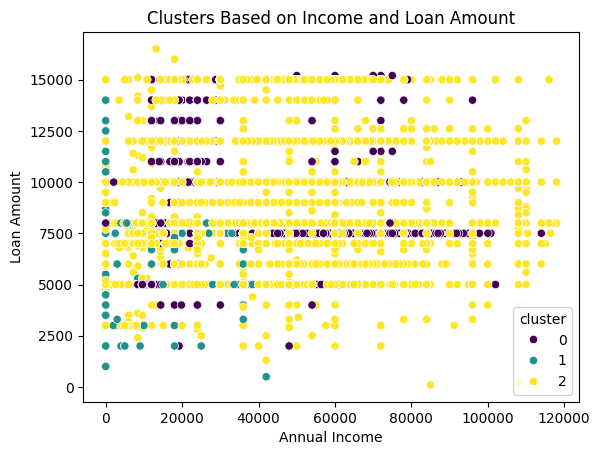

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['annual_income'], y=df['loan_amount'], hue=df['cluster'], palette='viridis')
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.title("Clusters Based on Income and Loan Amount")
plt.show()

### Creating 2 clusters

In [ ]:
df_cluster2=df.copy()

In [ ]:
selected_features = [
    "Id", "age", "sex", "annual_income", "monthly_expenses", "old_dependents", "young_dependents",  "home_ownership", "type_of_house",
    "occupants_count", "house_area", "loan_tenure", "loan_installments"
]

selected_num_features=['age', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'occupants_count', 'house_area', 'loan_tenure', 'loan_installments','loan_amount']
selected_cat_features= ['sex', 'type_of_house', 'home_ownership']

X2=df_cluster2[selected_num_features+selected_cat_features]

In [ ]:
preprocessor2=ColumnTransformer(
    [
        ("OneHotEncoder",encoder,selected_cat_features),
        ("StandardScaler",scaler,selected_num_features),
    ]
)

In [ ]:
X2=preprocessor2.fit_transform(X2)

In [ ]:
kmean=KMeans(n_clusters=2,random_state=42,n_init=10)
df_cluster2["cluster"]=kmean.fit_predict(X2)

In [ ]:
df_cluster2.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,...,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount,cluster
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,...,R,4,70.0,1,0,Apparels,12,12,5000.0,0
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,...,T1,4,80.0,1,0,Apparels,12,50,7500.0,0
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,...,T1,4,50.0,1,0,Beauty Salon,12,12,5000.0,0
3,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,...,T1,5,50.0,1,0,Apparels,12,50,7500.0,0
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,...,T1,1,112.0,1,0,Retail Store,12,12,5000.0,1


In [ ]:
X=df_cluster2.drop("cluster",axis=1)
Y=df_cluster2["cluster"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
x_train=preprocessor2.fit_transform(x_train)
x_test=preprocessor2.transform(x_test)

In [ ]:
models={
    "Logistic regresstion":LogisticRegression(),
    "Random forest":RandomForestClassifier(),
    "Ada boost":AdaBoostClassifier(),
    "Gradient boost":GradientBoostingClassifier(),
    "Decision tree":DecisionTreeClassifier()
}

In [ ]:
CR={}
accuracy_training={}
accuracy_testing={}
def model_trainer_classification(model,name):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    CR[name]=classification_report(y_pred,y_test)
    accuracy_testing[name]=accuracy_score(y_pred,y_test)
    accuracy_training[name]=accuracy_score(y_pred_train,y_train)

In [ ]:
for name,model in models.items():
    model_trainer_classification(model,name)

g:\ANN,RNN,LSTM proj\ANN\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
accuracy_testing

{'Logistic regresstion': 0.998375,
 'Random forest': 0.988875,
 'Ada boost': 0.992,
 'Gradient boost': 0.98925,
 'Decision tree': 0.98975}

In [ ]:
accuracy_training

{'Logistic regresstion': 0.99909375,
 'Random forest': 1.0,
 'Ada boost': 0.99365625,
 'Gradient boost': 0.99184375,
 'Decision tree': 1.0}